# Data Modelling using Scikit-Learn

Using models from the scikit-learn library, we will try to fit data to a simple machine learning model.

In [11]:
# Importing the necessary models

from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import roc_auc_score, f1_score


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

Let us import the dataset that we have preprocessed in data_preprocessing.ipynb

In [2]:
PATH = os.getcwd()
df = pd.read_csv(PATH + '\\datasets\\2019_preprocessed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Team1W          1278 non-null   int64  
 1   Team1L          1278 non-null   int64  
 2   Team1MIN        1278 non-null   float64
 3   Team1OFFRTG     1278 non-null   float64
 4   Team1DEFRTG     1278 non-null   float64
 5   Team1AST/TO     1278 non-null   float64
 6   Team1AST_RATIO  1278 non-null   float64
 7   Team1OREB%      1278 non-null   float64
 8   Team1DREB%      1278 non-null   float64
 9   Team1REB%       1278 non-null   float64
 10  Team1TS%        1278 non-null   float64
 11  Team1PACE       1278 non-null   float64
 12  Team1PIE        1278 non-null   float64
 13  Team2W          1278 non-null   int64  
 14  Team2L          1278 non-null   int64  
 15  Team2MIN        1278 non-null   float64
 16  Team2OFFRTG     1278 non-null   float64
 17  Team2DEFRTG     1278 non-null   f

Now that we have the data imported, we split the dataset into the input features and target variables, and split the data into training and testing data.

In [3]:
X = df.drop(['HomeWin'], axis=1)
y = df[['HomeWin']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0, shuffle=True)

Let us define a function to plot the learning curves for the machine learning models. *Function Definition taken from [Scikit-Learn Examples](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)*

In [4]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(5,5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

Let us now evaluate the models, one by one. We fit the model on the train data and compute the area under the **Receiver Operating Characteristic Curve (ROC AUC)** from prediction scores, the mean accuracy score, and the F1 score.

ROC Score: 0.7001292459307727, F1 score: 0.7769423558897244 and Accuracy Score: 0.721875.


<module 'matplotlib.pyplot' from 'C:\\Users\\Nishant\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

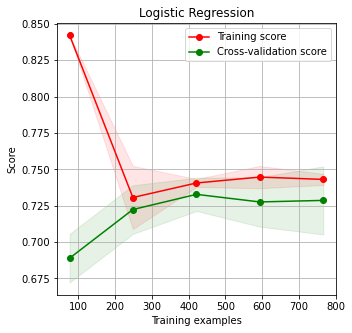

In [5]:
model1 = LogisticRegression(random_state=0)
model1.fit(train_X, train_y)
preds1 = model1.predict(test_X)

roc_1 = roc_auc_score(test_y, preds1)
f1_1 = f1_score(test_y, preds1)
score_1 = model1.score(test_X, test_y)

print(f'ROC Score: {roc_1}, F1 score: {f1_1} and Accuracy Score: {score_1}.')

plot_learning_curve(model1, 'Logistic Regression', train_X, train_y)

ROC Score: 0.7115796276101619, F1 score: 0.7828282828282829 and Accuracy Score: 0.73125


<module 'matplotlib.pyplot' from 'C:\\Users\\Nishant\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

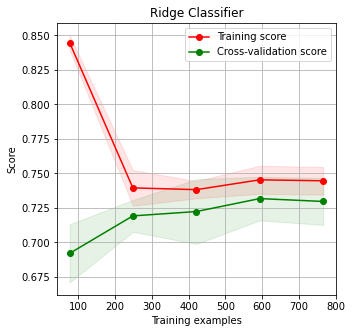

In [6]:
model2 = RidgeClassifierCV()
model2.fit(train_X, train_y)
preds2 = model2.predict(test_X)

roc_2 = roc_auc_score(test_y, preds2)
f1_2 = f1_score(test_y, preds2)
score_2 = model2.score(test_X, test_y)

print(f'ROC Score: {roc_2}, F1 score: {f1_2} and Accuracy Score: {score_2}')

plot_learning_curve(model2, 'Ridge Classifier', train_X, train_y)

In [7]:
model3 = LinearSVC(random_state=0)
model3.fit(train_X, train_y)
preds3 = model3.predict(test_X)

f1_3 = f1_score(test_y, preds3)
roc_3 = roc_auc_score(test_y, preds3)
score_3 = model3.score(test_X, test_y)

print(f'ROC Score: {roc_3}, F1 Score: {f1_3} and Accuracy Score: {score_3}')

# plot_learning_curve(model3, 'SVC with Linear kernel', train_X, train_y)

ROC Score: 0.538814168585161, F1 Score: 0.1800947867298578 and Accuracy Score: 0.459375


The next two models (Lasso and ElasticNet) follow regression rules, which means that the F1 score cannot be computed. Therefore, we use only the ROC AUC score for evaluation. The accuracy metric is also calculated in a different way (taken as the R<sup>2</sup> coefficient), so we will not be using that either 

ROC Score: 0.7785047861383739.


<module 'matplotlib.pyplot' from 'C:\\Users\\Nishant\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

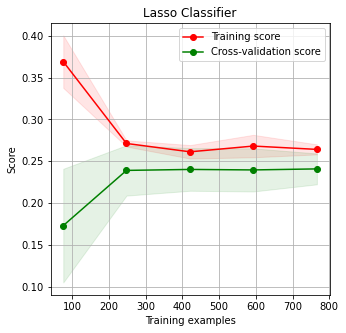

In [8]:
model4 = LassoCV(random_state=0)
model4.fit(train_X, train_y)
preds4 = model4.predict(test_X)

roc_4 = roc_auc_score(test_y, preds4)

print(f'ROC Score: {roc_4}.')

plot_learning_curve(model4, 'Lasso Classifier', train_X, train_y)

ROC Score: 0.7789490690254048.


<module 'matplotlib.pyplot' from 'C:\\Users\\Nishant\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

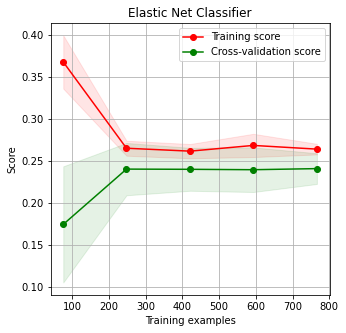

In [9]:
model5 = ElasticNetCV()
model5.fit(train_X, train_y)
preds5 = model5.predict(test_X)

roc_5 = roc_auc_score(test_y, preds5)

print(f'ROC Score: {roc_5}.')

plot_learning_curve(model5, 'Elastic Net Classifier', train_X, train_y)

Let us now try fitting the model using a Decision Tree and visualize it.

ROC Score: 0.5805161759360233


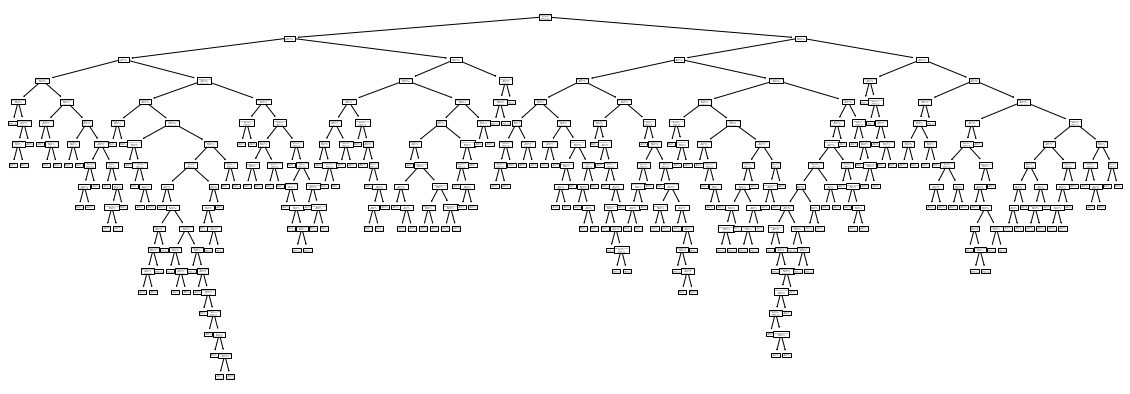

In [10]:
model6 = DecisionTreeClassifier(random_state=0)
data = model6.fit(train_X, train_y)
preds6 = model6.predict(test_X)

roc_6 = roc_auc_score(test_y, preds6)
print(f'ROC Score: {roc_6}')

plt.figure(figsize=(20,7))
plot_tree(data, feature_names=train_X.columns)
plt.show()

Let us now try ensembling methods like AdaBoost, RandomForest and GradientBoosting

ROC Score: 0.6463508219233409, F1 Score: 0.7202072538860104 and Accuracy Score: 0.6625


<module 'matplotlib.pyplot' from 'C:\\Users\\Nishant\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

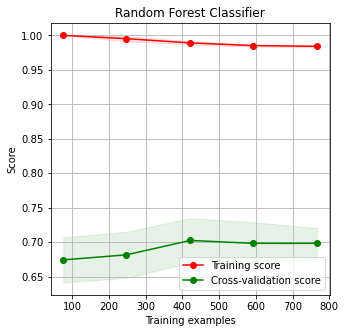

In [12]:
model7 = RandomForestClassifier(random_state=0)
model7.fit(train_X, train_y)
preds7 = model7.predict(test_X)

roc_7 = roc_auc_score(test_y, preds7)
f1_7 = f1_score(test_y, preds7)
score_7 = model7.score(test_X, test_y)

print(f'ROC Score: {roc_7}, F1 Score: {f1_7} and Accuracy Score: {score_7}')

plot_learning_curve(model7, 'Random Forest Classifier', train_X, train_y)

ROC Score: 0.6654347913889899, F1 Score: 0.7296587926509187 and Accuracy Score: 0.678125


<module 'matplotlib.pyplot' from 'C:\\Users\\Nishant\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

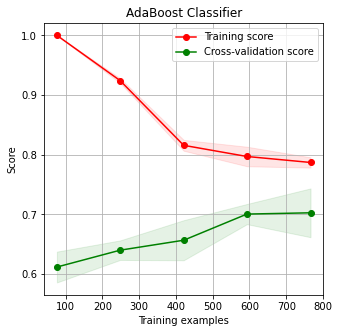

In [13]:
model8 = AdaBoostClassifier(random_state=0)
model8.fit(train_X, train_y)
preds8 = model8.predict(test_X)

roc_8 = roc_auc_score(test_y, preds8)
f1_8 = f1_score(test_y, preds8)
score_8 = model8.score(test_X, test_y)

print(f'ROC Score: {roc_8}, F1 Score: {f1_8} and Accuracy Score: {score_8}')

plot_learning_curve(model8, 'AdaBoost Classifier', train_X, train_y)

ROC Score: 0.6672119229371137, F1 Score: 0.7403598971722364 and Accuracy Score: 0.684375


<module 'matplotlib.pyplot' from 'C:\\Users\\Nishant\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

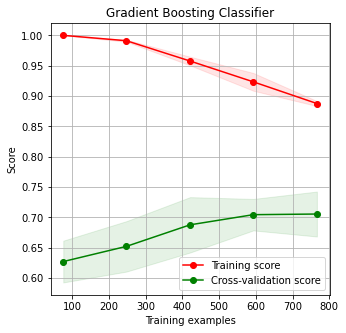

In [14]:
model9 = GradientBoostingClassifier(random_state=0)
model9.fit(train_X, train_y)
preds9 = model9.predict(test_X)

roc_9 = roc_auc_score(test_y, preds9)
f1_9 = f1_score(test_y, preds9)
score_9 = model9.score(test_X, test_y)

print(f'ROC Score: {roc_9}, F1 Score: {f1_9} and Accuracy Score: {score_9}')

plot_learning_curve(model9, 'Gradient Boosting Classifier', train_X, train_y)